## Dependencias

In [318]:
import numpy as np
import pandas as pd

import datetime as datetime

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import train_test_split

from varclushi import VarClusHi

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

cf.go_offline()
pd.set_option('display.max_columns',None)

## Lectura de datos

In [319]:
ruta = '/home/oscarjarillo/Documentos/Análisis Multivariado/Regresión_Lineal/CarPrice_Assignment.csv'

In [320]:
df = pd.read_csv(ruta)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [321]:
df.shape

(205, 26)

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [323]:
for v in list(df['fueltype'].unique()):
    if v == 'gas':
        df.loc[df['fueltype'] == v,'fueltype'] = 1
    if v == 'diesel':
        df.loc[df['fueltype'] == v,'fueltype'] = 0
        
df['fueltype'] = pd.to_numeric(df['fueltype'])

In [324]:
for v in list(df['doornumber'].unique()):
    if v == 'two':
        df.loc[df['doornumber'] == v, 'doornumber'] = 2
    if v == 'four':
        df.loc[df['doornumber'] == v, 'doornumber'] = 4
df['doornumber'] = pd.to_numeric(df['doornumber'])

In [325]:
for v in list(df['cylindernumber'].unique()):
    if v == 'two':
        df.loc[df['cylindernumber'] == v, 'cylindernumber'] = 2
    if v == 'three':
        df.loc[df['cylindernumber'] == v, 'cylindernumber'] = 3
    if v == 'four':
        df.loc[df['cylindernumber'] == v, 'cylindernumber'] = 4
    if v == 'five':
        df.loc[df['cylindernumber'] == v, 'cylindernumber'] = 5
    if v == 'six':
        df.loc[df['cylindernumber'] == v, 'cylindernumber'] = 6
    if v == 'twelve':
        df.loc[df['cylindernumber'] == v, 'cylindernumber'] = 12
    if v == 'eight':
        df.loc[df['cylindernumber'] == v, 'cylindernumber'] = 8
df['cylindernumber'] = pd.to_numeric(df['cylindernumber'])

In [326]:
for v in df.columns:
    if df[v].dtype == 'object':
        for a,i in zip(list(df[v].unique()), range(0,len(list(df[v].unique()))+1)):
            df.loc[df[v] == a, v] = i
        df[v] = pd.to_numeric(df[v])

## Definición de variables

In [327]:
um = ['car_ID']
vart = ['price']
varn = [v for v in df.columns if v not in vart and v!= 'car_ID'] 

## Análisis exploratorio

### Valores nulos

In [328]:
fuera = 1-df.describe().T[['count']]/len(df)
fuera

,count
car_ID,0.0
symboling,0.0
CarName,0.0
fueltype,0.0
aspiration,0.0
doornumber,0.0
carbody,0.0
drivewheel,0.0
enginelocation,0.0
wheelbase,0.0


### Multicolinealidad

In [329]:
vc = VarClusHi(df=df[varn], feat_list=varn).varclus().rsquare.sort_values(by=['Cluster','RS_Ratio']).reset_index(drop=True)
display(vc)
best = sorted(vc.groupby('Cluster').first()['Variable'])
best

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,carlength,0.878853,0.483826,0.234702
1,0,wheelbase,0.774977,0.361141,0.352226
2,0,carwidth,0.823861,0.546201,0.388143
3,0,curbweight,0.890643,0.738711,0.418529
4,0,boreratio,0.533830,0.348660,0.715709
5,0,drivewheel,0.429075,0.268137,0.780098
6,1,fueltype,0.936814,0.364503,0.099428
7,1,compressionratio,0.913522,0.262533,0.117264
8,1,peakrpm,0.453506,0.107189,0.612105
9,2,doornumber,0.696302,0.072236,0.327344


['carlength',
 'doornumber',
 'enginelocation',
 'enginetype',
 'fuelsystem',
 'fueltype',
 'horsepower']

### Extremos

array([[<AxesSubplot:title={'center':'carlength'}>,
        <AxesSubplot:title={'center':'doornumber'}>,
        <AxesSubplot:title={'center':'enginelocation'}>],
       [<AxesSubplot:title={'center':'enginetype'}>,
        <AxesSubplot:title={'center':'fuelsystem'}>,
        <AxesSubplot:title={'center':'fueltype'}>],
       [<AxesSubplot:title={'center':'horsepower'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

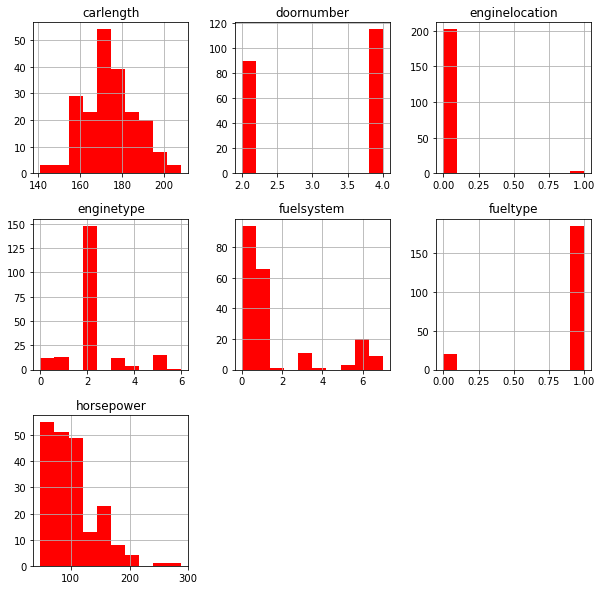

In [330]:
df[best].hist(figsize=(10,10),color='red')

In [331]:
X = df[best].copy()

In [332]:
for v,li,ls in X[best].describe(percentiles=[0.01,0.99]).T[['1%','99%']].reset_index().values:
    X[f'ex_{v}'] = ((X[v]<li)|(X[v]>ls)).astype(int)
X['ex_'] = X.filter(like='ex_').max(axis=1)
X['ex_'].value_counts(1)

0    0.936585
1    0.063415
Name: ex_, dtype: float64

In [333]:
X[um] = df[um]
X[vart] = df[vart]

In [334]:
X = X.loc[X['ex_']==0].drop(X.filter(like='ex_').columns,axis=1).reset_index(drop=True)

array([[<AxesSubplot:title={'center':'carlength'}>,
        <AxesSubplot:title={'center':'doornumber'}>,
        <AxesSubplot:title={'center':'enginelocation'}>],
       [<AxesSubplot:title={'center':'enginetype'}>,
        <AxesSubplot:title={'center':'fuelsystem'}>,
        <AxesSubplot:title={'center':'fueltype'}>],
       [<AxesSubplot:title={'center':'horsepower'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

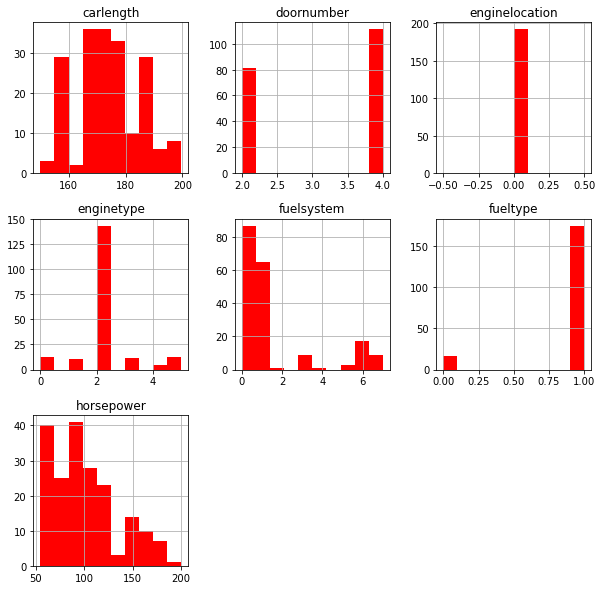

In [335]:
X[best].hist(figsize=(10,10),color='red')

### Selección de variables con mayor poder predictivo

In [336]:
sk = SelectKBest(k=len(X[best].columns),score_func=f_regression)
sk.fit(X[best],X[vart[0]])

SelectKBest(k=7, score_func=<function f_regression at 0x7fc8cb0b68c0>)

In [337]:
pd.DataFrame(zip(best,sk.scores_),columns=['var','score']).set_index('var').sort_values(by='score',
                                                                ascending=False).iplot(kind='bar',color='orange')

In [338]:
sk = SelectKBest(k=6,score_func=f_regression)
sk.fit(X[best],X[vart[0]])

SelectKBest(k=6, score_func=<function f_regression at 0x7fc8cb0b68c0>)

In [339]:
best = [a for a,b in zip(best,sk.get_support())if b]
best

['carlength',
 'doornumber',
 'enginetype',
 'fuelsystem',
 'fueltype',
 'horsepower']

## Partición

In [340]:
Xt,Xv,yt,yv = train_test_split(X[um+best],X[um+vart],train_size=0.7)
Xt.reset_index(drop=True,inplace=True)
Xv.reset_index(drop=True,inplace=True)
yt.reset_index(drop=True,inplace=True)
yv.reset_index(drop=True,inplace=True)

## Aprendizaje

In [341]:
modelo = LinearRegression(n_jobs=-1)
modelo.fit(Xt[best],yt[vart[0]])

LinearRegression(n_jobs=-1)

In [342]:
modelo.coef_,modelo.intercept_

(array([  232.25585653,  -664.36314597,   326.90895074,  -392.83334051,
        -6805.06879765,   110.59117807]),
 -30980.405255251477)

## Validación del modelo

In [343]:
St = Xt.merge(yt,on=um,how='inner')
Sv = Xv.merge(yv,on=um,how='inner')

In [344]:
St['y^'] = modelo.predict(Xt[best])
Sv['y^'] = modelo.predict(Xv[best])

In [345]:
print(mean_absolute_error(y_pred=St['y^'],y_true=St[vart[0]]))
print(mean_absolute_error(y_pred=Sv['y^'],y_true=Sv[vart[0]]))

2562.870385401666
2666.119809493164


<AxesSubplot:ylabel='Density'>

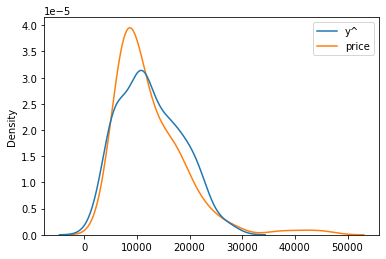

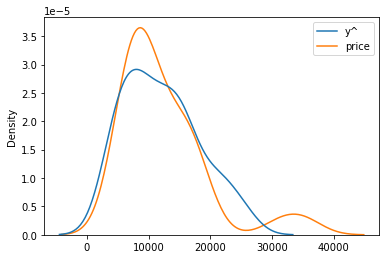

In [346]:
plt.figure()
sns.kdeplot(data=St[['y^']+vart])
plt.figure()
sns.kdeplot(data=Sv[['y^']+vart])